# 부동산 데이터 탐색
* 상업/업무용

In [1]:
'''
1. 데이터 불러오기
2. 데이터 타입 정리
3. Na 값 정리
#지도학습 1) 가격맞추기 2)분류하기 (y=use)
#비지도학습 1) 위치 좌표 나타내기 2) 군집화 
'''

'\n1. 데이터 불러오기\n2. 데이터 타입 정리\n3. Na 값 정리\n#지도학습 1) 가격맞추기 2)분류하기 (y=use)\n#비지도학습 1) 위치 좌표 나타내기 2) 군집화 \n'

### 라이브러리

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import plotly

### 데이터 불러오기

In [2]:
path = "Dataset/COMMERCE"
allFiles = glob.glob(os.path.join(path,"*.csv"))

In [3]:
allFiles

['Dataset/COMMERCE\\상업업무용(매매)-실거래가-201808.csv',
 'Dataset/COMMERCE\\상업업무용(매매)-실거래가-201809.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201512.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201601.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201602.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201603.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201604.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201605.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201606.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201607.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201608.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201609.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201610.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201611.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201612.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201701.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201702.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201703.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201704.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201705.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-20170

In [4]:
np_array_list = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None,skiprows = 15, engine='python')
    np_array_list.append(df.as_matrix())

comb_np_array = np.vstack(np_array_list)
dataset = pd.DataFrame(comb_np_array)
dataset.columns = df.columns

C:\Anaconda3\envs\public_data_eda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



In [5]:
dataset.columns

Index(['시군구', '유형', '지번', '도로명', '용도지역', '건축물주용도', '도로조건', '전용/연면적(㎡)',
       '대지면적(㎡)', '거래금액(만원)', '층', '계약년월', '계약일', '지분구분', '건축년도'],
      dtype='object')

In [6]:
dataset.columns = ["add_1", "type", "add_2","road_name", 
                   "use_district", "building_use", "road_condition", 
                   "GFA", "land_area", "price", "floor", 
                   "year_month", "day", "shares",
                   "built_year"]

### 전체 데이터셋 구조

#### Shape

In [7]:
dataset.shape # 관측치 : 257739, 항목 : 15

(257739, 15)

#### Dataset- Head, Tail

In [8]:
dataset.head()

,add_1,type,add_2,road_name,use_district,building_use,road_condition,GFA,land_area,price,floor,year_month,day,shares,built_year
0,강원도 강릉시 교동,일반,9**,화부산로,제2종일반주거,제2종근린생활,25m미만,596.76,307.40,"60,000",NaN,201808,11~20,,1989
1,강원도 강릉시 교동,일반,1***,솔올로5번길,일반상업,제2종근린생활,12m미만,2524.75,590.80,"350,000",NaN,201808,1~10,,2003
2,강원도 강릉시 교동,일반,2**,율곡로2874번길,일반상업,숙박,12m미만,226.56,126.00,"22,000",NaN,201808,21~31,,1983
3,강원도 강릉시 구정면 여찬리,일반,5**,말미길,계획관리,제2종근린생활,8m미만,20.64,84.00,"2,000",NaN,201808,11~20,,2015
4,강원도 강릉시 노암동,일반,5**,남부로136번길,자연녹지,제2종근린생활,8m미만,177.96,900.00,"19,600",NaN,201808,11~20,,2002


In [9]:
dataset.tail()

,add_1,type,add_2,road_name,use_district,building_use,road_condition,GFA,land_area,price,floor,year_month,day,shares,built_year
257734,충청북도 충주시 용산동,일반,2**,용산로,제2종일반주거,제1종근린생활,25m미만,122.32,126.00,"17,000",NaN,201807,11~20,,1974
257735,충청북도 충주시 용산동,일반,1***,남산1길,자연녹지,제2종근린생활,8m미만,22.44,274.33,"3,300",NaN,201807,21~31,,1991
257736,충청북도 충주시 주덕읍 신양리,일반,2**,시장길,일반상업,제2종근린생활,12m미만,151.47,107.00,"13,000",NaN,201807,11~20,,1988
257737,충청북도 충주시 충의동,일반,2*,충인8길,일반상업,제1종근린생활,8m미만,430.61,268.00,"20,000",NaN,201807,21~31,,1980
257738,충청북도 충주시 칠금동,일반,8**,계명대로,준주거,제1종근린생활,25m이상,1376.1,313.10,"247,000",NaN,201807,11~20,,2008


#### Describe
* 범주형 변수: add_1(8805),type(2),add_2(42),road_name(34543),use_district(27), building_use(7), road_condition(5), day(6), shares(2)
* 이산 및 연속형 변수: GFA, land_area, price, floor(86), year_month(34), built_year(114)

In [10]:
dataset.describe()

,add_1,type,add_2,road_name,use_district,building_use,road_condition,GFA,land_area,price,floor,year_month,day,shares,built_year
count,257739,257739,257739,257739,257739,257739,257739,257739.00,257739,257739,118494.0,257739,257739,257739,253478.0
unique,8805,2,42,34543,27,7,5,54556.00,13342,35412,86.0,34,6,2,114.0
top,서울특별시 구로구 구로동,집합,1***,-,일반상업,제2종근린생활,25m이상,4.96,,"20,000",1.0,201603,11~20,,2016.0
freq,2286,181002,44749,11385,79953,98035,83631,1234.00,181002,2791,39991.0,9529,83743,257690,14769.0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257739 entries, 0 to 257738
Data columns (total 15 columns):
add_1             257739 non-null object
type              257739 non-null object
add_2             257739 non-null object
road_name         257739 non-null object
use_district      257739 non-null object
building_use      257739 non-null object
road_condition    257739 non-null object
GFA               257739 non-null object
land_area         257739 non-null object
price             257739 non-null object
floor             118494 non-null object
year_month        257739 non-null object
day               257739 non-null object
shares            257739 non-null object
built_year        253478 non-null object
dtypes: object(15)
memory usage: 29.5+ MB


#### 변수별 고유값 확인

In [12]:

for i in range(len(dataset.columns)):
    print("="*100, "\n\n",
          "# ",list(dataset.columns)[i]," #\n\n",
          dataset[list(dataset.columns)[i]].unique(),"\n\n",
          "="*100, sep="")


# add_1 #

['강원도 강릉시 교동' '강원도 강릉시 구정면 여찬리' '강원도 강릉시 노암동' ... '충청북도 괴산군 청천면 덕평리'
 '충청북도 음성군 삼성면 용성리' '충청북도 충주시 금가면 오석리']


# type #

['일반' '집합']


# add_2 #

['9**' '1***' '2**' '5**' '8**' '9*' '1**' '4**' '2*' '5*' '6**' '4*'
 '3**' '1*' '6*' '7**' '*' '3*' '7*' '2***' '8*' '6***' '산8*' '3***'
 '5***' '4***' '산*' '산1**' '산3*' '산5*' '산3**' '산2*' '산4*' '산1*' '산2**'
 '산6*' '산7*' '7***' '산4**' '산9**' '산2***' '산1***']


# road_name #

['화부산로' '솔올로5번길' '율곡로2874번길' ... '사뜸로51번길' '봉명로126번길' '물탕2길']


# use_district #

['제2종일반주거' '일반상업' '계획관리' '자연녹지' '제1종일반주거' '준주거' '보전관리' '제3종일반주거' '일반공업'
 '자연환경보전' '생산관리' '생산녹지' '중심상업' '근린상업' '제1종전용주거' '개발제한구역' '농림' '보전녹지' '준공업'
 '유통상업' '용도미지정' '제2종전용주거' '일반주거' '전용공업' '관리' '전용주거' '기타']


# building_use #

['제2종근린생활' '숙박' '제1종근린생활' '기타' '교육연구' '판매' '업무']


# road_condition #

['25m미만' '12m미만' '8m미만' '25m이상' '-']


# GFA #

[596.76 2524.75 226.56 ... 181.66 430.61 1376.1]


# land_area #

['307.40' '590.80' '126.00' ... '1261.40' '1868.00' '1510.60']


# price

####  Datatype

In [13]:
dataset.dtypes

add_1             object
type              object
add_2             object
road_name         object
use_district      object
building_use      object
road_condition    object
GFA               object
land_area         object
price             object
floor             object
year_month        object
day               object
shares            object
built_year        object
dtype: object

In [14]:
#Edit Type 
b = {'일반':1,'집합':2}
dataset['type'] = dataset['type'].replace(b)
print(dataset['type'].value_counts())

dataset['type']=dataset['type'].astype('category')

2    181002
1     76737
Name: type, dtype: int64


In [15]:
#Edit GFA datatype
dataset['GFA']=dataset['GFA'].astype('float')
print(dataset['GFA'].describe())

count    257739.000000
mean        219.341199
std        1157.313622
min           0.040000
25%          27.630000
50%          65.760000
75%         175.065000
max      259730.850000
Name: GFA, dtype: float64


In [16]:
#Edit price type & deleting comma
dataset['price']=dataset['price'].str.replace(",","").astype('int64')
print(dataset['price'].describe())

count    2.577390e+05
mean     6.497444e+04
std      4.875732e+05
min      1.010000e+02
25%      8.800000e+03
50%      2.250000e+04
75%      5.200000e+04
max      8.932397e+07
Name: price, dtype: float64


In [16]:
for i in range(len(dataset.columns)) :
    print(list(dataset.columns)[i],"결측치 수 :",sum(dataset[list(dataset.columns)[i]].isnull()))

add_1 결측치 수 : 0
type 결측치 수 : 0
add_2 결측치 수 : 0
road_name 결측치 수 : 0
use_district 결측치 수 : 0
building_use 결측치 수 : 0
road_condition 결측치 수 : 0
GFA 결측치 수 : 0
land_area 결측치 수 : 0
price 결측치 수 : 0
floor 결측치 수 : 139245
year_month 결측치 수 : 0
day 결측치 수 : 0
shares 결측치 수 : 0
built_year 결측치 수 : 4261


In [17]:
for i in range(len(dataset.columns)) :
    print(list(dataset.columns)[i],"결측치 수 :",sum(dataset[list(dataset.columns)[i]].isnull()))

add_1 결측치 수 : 0
type 결측치 수 : 0
add_2 결측치 수 : 0
road_name 결측치 수 : 0
use_district 결측치 수 : 0
building_use 결측치 수 : 0
road_condition 결측치 수 : 0
GFA 결측치 수 : 0
land_area 결측치 수 : 0
price 결측치 수 : 0
floor 결측치 수 : 139245
year_month 결측치 수 : 0
day 결측치 수 : 0
shares 결측치 수 : 0
built_year 결측치 수 : 4261


In [17]:
#Edit land_area type
dataset['land_area']=dataset['land_area'].str.replace(".00","")
dataset['land_area']=dataset['land_area'].str.replace(" ","")

In [18]:
dataset['land_area'] = dataset['land_area'].replace(r'^\s*$', np.nan, regex=True)
dataset['land_area']=dataset['land_area'].astype(float)

dataset['land_area'].describe()

count     76225.000000
mean        521.132047
std        4624.277102
min           0.000000
25%         149.800000
50%         263.500000
75%         498.200000
max      716164.800000
Name: land_area, dtype: float64

print(dataset["land_area"].unique())
print(dataset["land_area"].replace('', np.nan, inplace=True))
dataset['land_area']=dataset['land_area'].astype(float)
print([dataset['land_area'].describe()])

In [19]:
for i in range(len(dataset.columns)) :
    print(list(dataset.columns)[i],"결측치 수 :",sum(dataset[list(dataset.columns)[i]].isnull()))

add_1 결측치 수 : 0
type 결측치 수 : 0
add_2 결측치 수 : 0
road_name 결측치 수 : 0
use_district 결측치 수 : 0
building_use 결측치 수 : 0
road_condition 결측치 수 : 0
GFA 결측치 수 : 0
land_area 결측치 수 : 181514
price 결측치 수 : 0
floor 결측치 수 : 139245
year_month 결측치 수 : 0
day 결측치 수 : 0
shares 결측치 수 : 0
built_year 결측치 수 : 4261


In [20]:
#Edit built_year type
dataset['built_year']=dataset['built_year'].astype('float')
#a=(dataset['built_year']>1900)&(dataset['built_year']<2018)
#...?
print(dataset['built_year'].describe())
print(dataset['built_year'].value_counts())

count    253478.000000
mean       2000.991021
std          23.326165
min           0.000000
25%        1994.000000
50%        2003.000000
75%        2010.000000
max        2018.000000
Name: built_year, dtype: float64
2016.0    14769
2004.0    11948
2003.0    10791
2007.0    10403
2015.0    10219
2002.0    10211
2017.0    10036
2008.0     9741
2005.0     9162
2006.0     8809
1997.0     8200
1996.0     7509
2009.0     6733
2013.0     6497
2014.0     6427
1995.0     6396
2012.0     6290
1994.0     6115
2010.0     6041
1998.0     5736
2011.0     5561
2001.0     5513
1993.0     5400
1992.0     5361
1991.0     4875
2000.0     4629
1990.0     4492
1988.0     3657
1999.0     3646
1989.0     3332
          ...  
1946.0       19
1920.0       17
1944.0       16
1939.0       14
1900.0       13
1925.0       13
1932.0       12
1931.0       12
1924.0       10
1915.0       10
1933.0       10
1929.0        8
1926.0        6
1927.0        6
1914.0        5
1910.0        5
1928.0        4
1918.0        3

In [21]:
pd.value_counts(dataset['built_year'].values, sort=False, ascending=False)

0.0          20
73.0          1
19.0          3
1800.0        1
1900.0       13
1903.0        1
1905.0        1
1909.0        1
1910.0        5
1913.0        1
1914.0        5
1915.0       10
1916.0        2
1918.0        3
1920.0       17
1.0           1
1921.0        1
1922.0        1
1923.0        1
1924.0       10
1925.0       13
1926.0        6
1927.0        6
1928.0        4
1929.0        8
1930.0       37
1931.0       12
1932.0       12
1933.0       10
1934.0       21
          ...  
1989.0     3332
1990.0     4492
1991.0     4875
1992.0     5361
1993.0     5400
1994.0     6115
1995.0     6396
1996.0     7509
1997.0     8200
1998.0     5736
1999.0     3646
2000.0     4629
2001.0     5513
2002.0    10211
2003.0    10791
2004.0    11948
2005.0     9162
2006.0     8809
2007.0    10403
2008.0     9741
2009.0     6733
2010.0     6041
2011.0     5561
2012.0     6290
2013.0     6497
2014.0     6427
2015.0    10219
2016.0    14769
2017.0    10036
2018.0     2804
Length: 114, dtype: int6

#How to find Specific Values?
print(dataset['built_year'].eq(0).sum())
print(dataset['price'].eq(0).sum())
print(dataset['GFA'].eq(0).sum())
print(dataset['floor'].eq(0).sum())
print(dataset['land_area'].eq('0').sum())

In [22]:
#Edit Road_condition type

c = {'8m미만':1,'12m미만':2,'25m미만':3,'25m이상':4}
dataset['road_condition'] = dataset['road_condition'].replace(c)
print(dataset['road_condition'].value_counts())

dataset['road_condition']=dataset['road_condition'].astype('category')
#astype('category')...?

4    83631
3    73242
2    60191
1    35522
-     5153
Name: road_condition, dtype: int64


In [23]:
#Edit Year_month type
dataset['year_month']=dataset['year_month'].astype('int64')
print([dataset['year_month'].describe()])

[count    257739.000000
mean     201684.701264
std          82.230377
min      201512.000000
25%      201607.000000
50%      201704.000000
75%      201712.000000
max      201809.000000
Name: year_month, dtype: float64]


In [24]:
#Edit Day type
dataset['day'].value_counts()
#83743+80895+57010+29138+4171+2782=257739

11~20    83743
1~10     80895
21~31    57010
21~30    29138
21~28     4171
21~29     2782
Name: day, dtype: int64

In [25]:
''' 
Change type 'contractD' as categorical type --> 월별로 범위가 달라서 categorical 형태를 무리
--> Category
--> '1~10':1,
    '11~20':2,
    '21~30':3,
    '21~28':3,
    '21~31':3,
    '21~29':3로 형태 바꾸기
'''
d = {'1~10':1,'11~20':2,'21~30':3,'21~28':3,'21~31':3,'21~29':3}
dataset['day'] = dataset['day'].replace(d)

In [26]:
print(dataset['day'].value_counts()) 
#93101+83743+80895=257739
dataset['day']=dataset['day'].astype('category')
print(dataset['day'].astype('category').describe())

3    93101
2    83743
1    80895
Name: day, dtype: int64
count     257739
unique         3
top            3
freq       93101
Name: day, dtype: int64


In [27]:
#Edit floor - ... How to deal 'NaN'
print(pd.value_counts(dataset['floor'].values))
print(dataset['floor'])
#replace NaN to None
dataset['floor']=dataset['floor'].where((pd.notnull(dataset['floor'])),None)
print(dataset['floor'])

 1.0     39991
 2.0     22702
 3.0     13589
 4.0      8965
 5.0      7082
 6.0      5125
 7.0      3818
 8.0      2642
-1.0      1865
 10.0     1713
 9.0      1607
 11.0     1007
 12.0      665
 13.0      641
 20.0      636
 14.0      594
 15.0      487
 30.0      482
 26.0      361
 16.0      309
 17.0      278
 27.0      254
 22.0      248
 21.0      246
 23.0      222
 70.0      219
 31.0      204
 40.0      183
 18.0      176
 24.0      171
         ...  
 46.0       23
 63.0       22
 35.0       21
 47.0       17
 59.0       17
 64.0       17
 53.0       17
 68.0       15
 74.0       15
 39.0       14
 67.0       13
 52.0       12
 65.0       11
 73.0       11
 36.0       10
 49.0       10
 48.0        9
 69.0        7
 81.0        7
 82.0        6
 91.0        6
-5.0         4
 54.0        3
 57.0        2
 55.0        2
 83.0        2
 56.0        1
 77.0        1
 92.0        1
 58.0        1
Length: 86, dtype: int64
0         NaN
1         NaN
2         NaN
3         NaN
4   

In [28]:
dataset['floor'].describe()

count     118494.0
unique        86.0
top            1.0
freq       39991.0
Name: floor, dtype: float64

In [29]:
#use district
dataset['use_district']=dataset['use_district'].astype('category')
dataset['use_district'].astype('category').value_counts()

일반상업       79953
제2종일반주거    47454
제3종일반주거    27725
준주거        24848
계획관리       20219
중심상업       15674
자연녹지        9783
제1종일반주거     9703
준공업         8327
근린상업        5961
일반공업        1655
유통상업        1305
자연환경보전      1140
생산관리         688
보전관리         671
용도미지정        613
생산녹지         573
개발제한구역       570
농림           349
보전녹지         244
제1종전용주거      155
제2종전용주거       97
전용공업          16
일반주거          11
관리             3
기타             1
전용주거           1
Name: use_district, dtype: int64

In [30]:
#building use
dataset['building_use']=dataset['building_use'].astype('category')
dataset['building_use'].astype('category').value_counts()

제2종근린생활    98035
제1종근린생활    77069
판매         30242
숙박         26827
업무         12245
기타          8104
교육연구        5217
Name: building_use, dtype: int64

In [31]:
#shares ...?
dataset['shares']=dataset['shares'].str.replace(" ","")
dataset['shares']=dataset['shares'].replace(r'^\s*$', 'NaN', regex=True)
dataset['shares'].unique()

array(['NaN', '지분'], dtype=object)

In [32]:
e = {'NaN':1,'지분':2}
dataset['shares'] = dataset['shares'].replace(e)
print(dataset['shares'].value_counts())

dataset['shares']=dataset['shares'].astype('category')

1    257690
2        49
Name: shares, dtype: int64


#### Data types

In [33]:
#After Editing Data Type
print("After Data type : \n{}".format(dataset.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257739 entries, 0 to 257738
Data columns (total 15 columns):
add_1             257739 non-null object
type              257739 non-null category
add_2             257739 non-null object
road_name         257739 non-null object
use_district      257739 non-null category
building_use      257739 non-null category
road_condition    257739 non-null category
GFA               257739 non-null float64
land_area         76225 non-null float64
price             257739 non-null int64
floor             118494 non-null object
year_month        257739 non-null int64
day               257739 non-null category
shares            257739 non-null category
built_year        253478 non-null float64
dtypes: category(6), float64(3), int64(2), object(4)
memory usage: 19.2+ MB
After Data type : 
None


#### 결측치 처리

In [34]:
for i in range(len(dataset.columns)) :
    print(list(dataset.columns)[i],"결측치 수 :",sum(dataset[list(dataset.columns)[i]].isnull()))

add_1 결측치 수 : 0
type 결측치 수 : 0
add_2 결측치 수 : 0
road_name 결측치 수 : 0
use_district 결측치 수 : 0
building_use 결측치 수 : 0
road_condition 결측치 수 : 0
GFA 결측치 수 : 0
land_area 결측치 수 : 181514
price 결측치 수 : 0
floor 결측치 수 : 139245
year_month 결측치 수 : 0
day 결측치 수 : 0
shares 결측치 수 : 0
built_year 결측치 수 : 4261


In [35]:
dataset.isnull().sum().to_frame()

,0
add_1,0
type,0
add_2,0
road_name,0
use_district,0
building_use,0
road_condition,0
GFA,0
land_area,181514
price,0


In [36]:
# 결측치 포함 관측치 비율 확인
print("land_area 결측치 비율 : ", round(sum(dataset["land_area"].isnull()) / len(dataset), 4) * 100, "%", sep="")
print("="*50)
# 도로명 주소 결측있는 관측치와 결측없는 관측치에 대해 연속형 변수 값의 평균 비교
print("결측_GFA_평균 : ",dataset["GFA"][dataset["land_area"].isnull()==True].mean(),sep="")
print("무결_GFA_평균 : ",dataset["GFA"][dataset["land_area"].isnull()==False].mean(),sep="")
print("="*50)
print("결측_land_area_평균 : ",dataset["land_area"][dataset["land_area"].isnull()==True].mean(),sep="")
print("무결_land_area_평균 : ",dataset["land_area"][dataset["land_area"].isnull()==False].mean(),sep="")
print("="*50)
print("결측_price_평균 : ",dataset["price"][dataset["land_area"].isnull()==True].mean(),sep="")
print("무결_price_평균 : ",dataset["price"][dataset["land_area"].isnull()==False].mean(),sep="")
print("="*50)
print("결측_built_year_평균 : ",dataset["built_year"][dataset["land_area"].isnull()==True].mean(),sep="")
print("무결_built_year_평균 : ",dataset["built_year"][dataset["land_area"].isnull()==False].mean(),sep="")

land_area 결측치 비율 : 70.43%
결측_GFA_평균 : 79.38136755292462
무결_GFA_평균 : 552.6264579862293
결측_land_area_평균 : nan
무결_land_area_평균 : 521.1320468350331
결측_price_평균 : 30153.256437519973
무결_price_평균 : 147893.8548901279
결측_built_year_평균 : 2003.6863690792975
무결_built_year_평균 : 1994.339343858593


In [37]:
# 결측치 포함 관측치 비율 확인
print("floor 결측치 비율 : ", round(sum(dataset["floor"].isnull()) / len(dataset), 4) * 100, "%", sep="")
print("="*50)
# 도로명 주소 결측있는 관측치와 결측없는 관측치에 대해 연속형 변수 값의 평균 비교
print("결측_GFA_평균 : ",dataset["GFA"][dataset["floor"].isnull()==True].mean(),sep="")
print("무결_GFA_평균 : ",dataset["GFA"][dataset["floor"].isnull()==False].mean(),sep="")
print("="*50)
print("결측_land_area_평균 : ",dataset["land_area"][dataset["floor"].isnull()==True].mean(),sep="")
print("무결_land_area_평균 : ",dataset["land_area"][dataset["floor"].isnull()==False].mean(),sep="")
print("="*50)
print("결측_price_평균 : ",dataset["price"][dataset["floor"].isnull()==True].mean(),sep="")
print("무결_price_평균 : ",dataset["price"][dataset["floor"].isnull()==False].mean(),sep="")
print("="*50)
print("결측_built_year_평균 : ",dataset["built_year"][dataset["floor"].isnull()==True].mean(),sep="")
print("무결_built_year_평균 : ",dataset["built_year"][dataset["floor"].isnull()==False].mean(),sep="")

floor 결측치 비율 : 54.03%
결측_GFA_평균 : 338.17566835435383
무결_GFA_평균 : 79.69610587877989
결측_land_area_평균 : 522.0148817159131
무결_land_area_평균 : 30.817153284671527
결측_price_평균 : 95160.77927394162
무결_price_평균 : 29501.78547437001
결측_built_year_평균 : 1997.3365308697546
무결_built_year_평균 : 2005.1896708122451


In [38]:
# 결측치 포함 관측치 비율 확인
print("built_year 결측치 비율 : ", round(sum(dataset["built_year"].isnull()) / len(dataset), 4) * 100, "%", sep="")
print("="*50)
# 도로명 주소 결측있는 관측치와 결측없는 관측치에 대해 연속형 변수 값의 평균 비교
print("결측_GFA_평균 : ",dataset["GFA"][dataset["built_year"].isnull()==True].mean(),sep="")
print("무결_GFA_평균 : ",dataset["GFA"][dataset["built_year"].isnull()==False].mean(),sep="")
print("="*50)
print("결측_land_area_평균 : ",dataset["land_area"][dataset["built_year"].isnull()==True].mean(),sep="")
print("무결_land_area_평균 : ",dataset["land_area"][dataset["built_year"].isnull()==False].mean(),sep="")
print("="*50)
print("결측_price_평균 : ",dataset["price"][dataset["built_year"].isnull()==True].mean(),sep="")
print("무결_price_평균 : ",dataset["price"][dataset["built_year"].isnull()==False].mean(),sep="")
print("="*50)
print("결측_built_year_평균 : ",dataset["built_year"][dataset["built_year"].isnull()==True].mean(),sep="")
print("무결_built_year_평균 : ",dataset["built_year"][dataset["built_year"].isnull()==False].mean(),sep="")

built_year 결측치 비율 : 1.6500000000000001%
결측_GFA_평균 : 192.0847758742077
무결_GFA_평균 : 219.79938329954967
결측_land_area_평균 : 374.8475886298309
무결_land_area_평균 : 527.3981786466767
결측_price_평균 : 69196.61018540249
무결_price_평균 : 64903.46508178225
결측_built_year_평균 : nan
무결_built_year_평균 : 2000.9910209170027


In [39]:
#Edit Shares
#NaN값은 0.0으로 설정 
'''
How to process observations without values?

option 1. Remove the observations with Null value
option 2. Delete the entire feature
option 3. Fill with some value(0,mean,median ...)

'''
#dataset.loc[dataset['shares'].isnull(),'shares'] = 0.0
#dataset.loc[dataset['floor'].isnull(),'floor'] =''
dataset.loc[dataset['built_year'].isnull(),'built_year'] =0.0
dataset.isnull().sum().to_frame()

,0
add_1,0
type,0
add_2,0
road_name,0
use_district,0
building_use,0
road_condition,0
GFA,0
land_area,181514
price,0


#  NaN ratio  -> use option 1 ...? 4261...

dataset = dataset.dropna(axis=0)
dataset.isnull().sum().to_frame()

### Data save

In [45]:
dataset.to_csv('commerce.csv',sep=',',encoding='ms949')

#### Data info

In [46]:
print("After Data type : \n{}".format(dataset.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257739 entries, 0 to 257738
Data columns (total 15 columns):
add_1             257739 non-null object
type              257739 non-null category
add_2             257739 non-null object
road_name         257739 non-null object
use_district      257739 non-null category
building_use      257739 non-null category
road_condition    257739 non-null category
GFA               257739 non-null float64
land_area         76225 non-null float64
price             257739 non-null int64
floor             118494 non-null object
year_month        257739 non-null int64
day               257739 non-null category
shares            257739 non-null category
built_year        257739 non-null float64
dtypes: category(6), float64(3), int64(2), object(4)
memory usage: 19.2+ MB
After Data type : 
None


In [47]:
#Shares... NaN values
dataset

,add_1,type,add_2,road_name,use_district,building_use,road_condition,GFA,land_area,price,floor,year_month,day,shares,built_year
0,강원도 강릉시 교동,일반,9**,화부산로,제2종일반주거,제2종근린생활,3,596.76,307.40,60000,None,201808,2,1,1989.0
1,강원도 강릉시 교동,일반,1***,솔올로5번길,일반상업,제2종근린생활,2,2524.75,590.80,350000,None,201808,1,1,2003.0
2,강원도 강릉시 교동,일반,2**,율곡로2874번길,일반상업,숙박,2,226.56,126.00,22000,None,201808,3,1,1983.0
3,강원도 강릉시 구정면 여찬리,일반,5**,말미길,계획관리,제2종근린생활,1,20.64,84.00,2000,None,201808,2,1,2015.0
4,강원도 강릉시 노암동,일반,5**,남부로136번길,자연녹지,제2종근린생활,1,177.96,NaN,19600,None,201808,2,1,2002.0
5,강원도 강릉시 노암동,일반,8**,노암길42번길,제1종일반주거,제2종근린생활,2,252.73,211.30,21000,None,201808,1,1,1995.0
6,강원도 강릉시 병산동,일반,2**,성덕로,자연녹지,제2종근린생활,4,699.84,947.00,52000,None,201808,3,1,2006.0
7,강원도 강릉시 사천면 사천진리,일반,2**,해안로,제2종일반주거,제2종근린생활,1,270.00,1887.00,157000,None,201808,1,1,2003.0
8,강원도 강릉시 성남동,일반,9*,금성로35번길,일반상업,제2종근린생활,1,85.62,123.00,17000,None,201808,3,1,1952.0
9,강원도 강릉시 옥천동,일반,1**,옥가로7번길,일반상업,제2종근린생활,2,162.68,61.80,20500,None,201808,2,1,1989.0


#### missingno

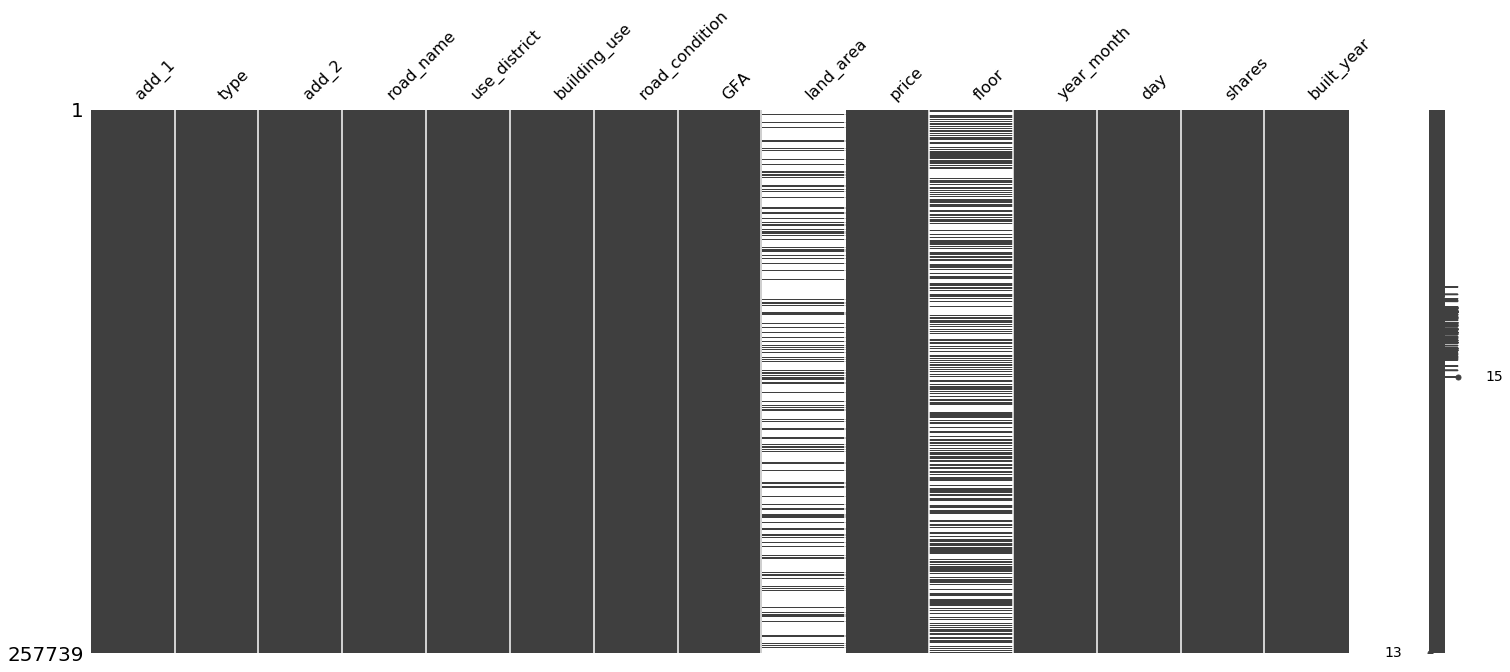

In [42]:
#!pip install missingno
import missingno 
import matplotlib
%matplotlib inline

missingno.matrix(dataset)

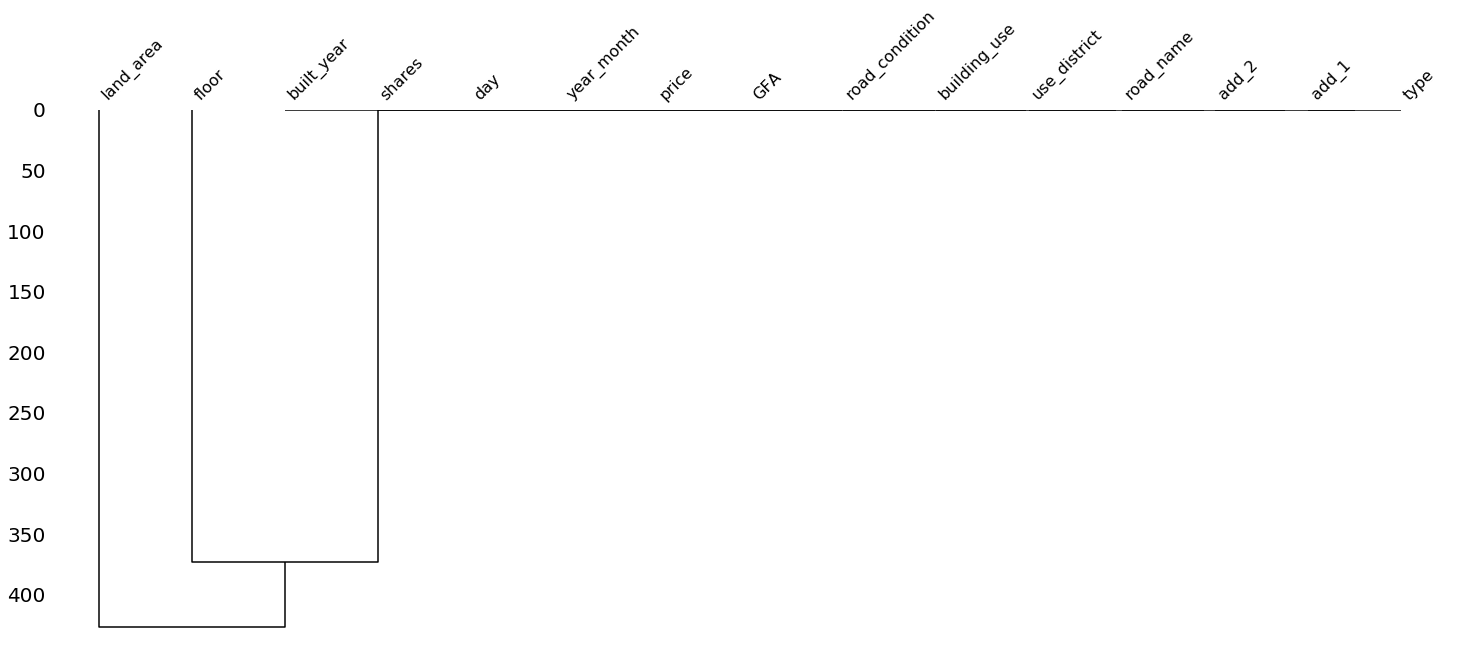

In [43]:
missingno.dendrogram(dataset)

In [53]:
# 결측치 포함 관측치 비율 확인
print("도로명 주소 결측치 비율 : ", round(sum(dataset["road_name"].isnull()) / len(dataset), 4) * 100, "%", sep="")
print("="*50)
# 도로명 주소 결측있는 관측치와 결측없는 관측치에 대해 연속형 변수 값의 평균 비교
print("결측_GFA_평균 : ",dataset["GFA"][dataset["road_name"].isnull()==True].mean(),sep="")
print("무결_GFA_평균 : ",dataset["GFA"][dataset["road_name"].isnull()==False].mean(),sep="")
print("="*50)
print("결측_land_area_평균 : ",dataset["land_area"][dataset["road_name"].isnull()==True].mean(),sep="")
print("무결_land_area_평균 : ",dataset["land_area"][dataset["road_name"].isnull()==False].mean(),sep="")
print("="*50)
print("결측_price_평균 : ",dataset["price"][dataset["road_name"].isnull()==True].mean(),sep="")
print("무결_price_평균 : ",dataset["price"][dataset["road_name"].isnull()==False].mean(),sep="")
print("="*50)
print("결측_built_year_평균 : ",dataset["built_year"][dataset["road_name"].isnull()==True].mean(),sep="")
print("무결_built_year_평균 : ",dataset["built_year"][dataset["road_name"].isnull()==False].mean(),sep="")

도로명 주소 결측치 비율 : 0.0%
결측_GFA_평균 : nan
무결_GFA_평균 : 79.69610587877989
결측_land_area_평균 : nan


TypeError: Could not convert                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               37.67                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               1.29                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  11.00                                                                                                                                                                                                                                                                                16.95                                                                                                                                                             13.55                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          82.00                                                                                                        18.39                                                                        28.0852.2052.2056.1552.2056.15                                                                                          4.42        3.41                                         25.39                                                                                                                                                                                                                                                                            37.46                   16.76                                                                                                                                                                                              10.91            21.08           3.664.39                                      29.60                      35.61                                                                                                                              5.86                                                                                                                                                                                                                                                             3.22                             46.6546.6546.6546.6546.6546.65                                                                                                                                                                                                                            117.29                                                                                                                                                                      8.23                                                          12.49                                                                                    33.64   33.64                                                                                                                            5.50                                                                                                                                                                      37.2133.30                                                                                                                                                                                                                                                                                                          22.65        16.35          16.78                                   98.08  35.4422.24                                                                                                                                              75.4722.5325.6625.5456.3318.40                                                                                                                198.62                                                                                                                                                                                                       4.054.052.02                            1.64                                                                                                                                   4.382.19   22.70                                                                                                                                                                                                                                                                                                                                           16.54                                                                                    14.0713.69                                   4.394.39        2.34                                                         5.684.20                                                                                                                                       5.865.865.86                                                                                                                                                                                                                                                                                                 58.34                                                                           3.223.223.223.2215.74               51.55        98.39112.99                                    63.69                                                                                                                     9.82                                                                       39.44                                                                                                                                                                                                                                                                                                                         6.23                                                                                                    44.65                                                          2.18                                                                                                                                                                                                                                                                                                           23.23                                                                                                                                        35.72                                     16.5215.2115.40                                                                                                                                                                                                                                            3.04                                                            52.2052.20                                                                                5.72                                   22.44                                                                                                                                                                                                                                                                                                                                                                                                                                                                       4.392.943.66                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            312.20127.9840.1546.6840.1540.1537.7939.2240.15                                                                                                                3.223.22                                     113.0198.39                                                                                                                                    17.84                                                                                                                                  7.317.31        7.31                                                                                                                                                                             3.88                                                                                                                                                                                                                                                                                                                                                      23.3521.35                                                                                                                           12.7127.47  14.4313.04                                                                                                                                                                                                                                                                                                                                        18.5956.337.1717.465.63                                                                                                                                                                                                                                                                                                                                                               5.50                                                                                                                                                                                                                                                                                                     91.2891.284.055.06                                                                                                                                                                                                                                                                                                                                31.35                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             17.10                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   2.25                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             3.22                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          to numeric

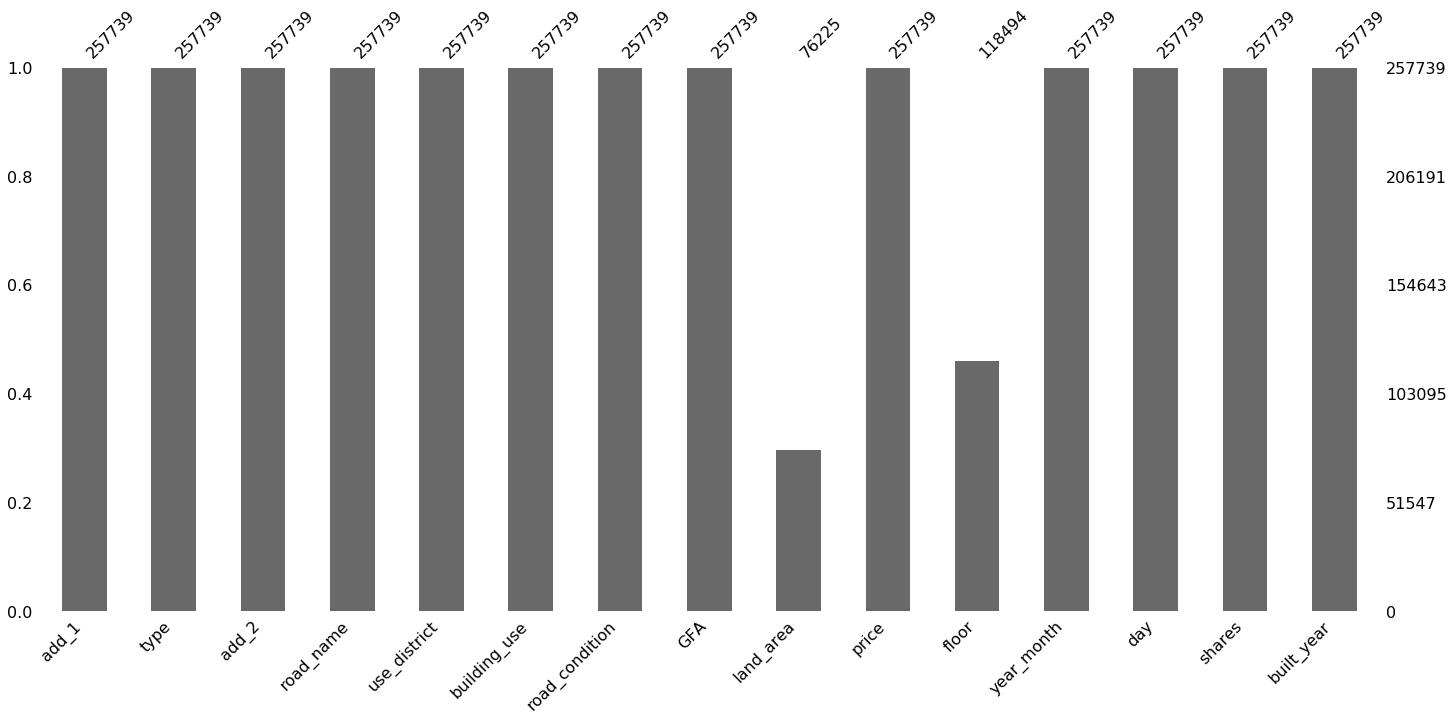

In [47]:
missingno.bar(dataset)

## Excel Edit

### 엑셀 불러오기 

f=pd.read_csv('commerce.csv',index_col=None,usecols=range(1,16),engine='python')
f

f.info()

### Feature Engineering

* add_1 변수를 분할하여 add_do, add_si 변수 생성

In [48]:
# "add_1" 변수를 분할하여, "add_do", "add_si" 변수 생성
dataset['add_do'] = dataset['add_1'].apply(lambda e: e.split()[0])
dataset['add_si'] = dataset['add_1'].apply(lambda e: e.split()[1])

In [49]:
# "add_2" 변수 삭제
del(dataset["add_2"])

In [50]:
# dataset 컬럼 순서 변경 하여 df 데이터프레임 생성
df = dataset[["add_1", "add_do", "add_si", "type", "road_name", "use_district", "building_use", "road_condition", "GFA", "land_area", "price", "floor", "year_month", "day", 
              "shares", "built_year"]]

FAR(Floor Area Rate) 변수 생성 $$
{FAR} = {GFA \over land area}
$$
"FAR"이 1이상 이면 1, 1이하 이면, 0값을 할당(Categorical Variable)

In [51]:
df["FAR"] = 0
df["FAR"][df["GFA"]/df["land_area"] >= 1] = 1
df["FAR"]=df["FAR"].astype("object")

C:\Anaconda3\envs\public_data_eda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Anaconda3\envs\public_data_eda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Anaconda3\envs\public_data_eda\lib\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Anaconda3\envs\public_data_eda\lib\site-packages\IPython\

In [52]:
df.head()

,add_1,add_do,add_si,type,road_name,use_district,building_use,road_condition,GFA,land_area,price,floor,year_month,day,shares,built_year,FAR
0,강원도 강릉시 교동,강원도,강릉시,1,화부산로,제2종일반주거,제2종근린생활,3,596.76,307.4,60000,None,201808,2,1,1989.0,1
1,강원도 강릉시 교동,강원도,강릉시,1,솔올로5번길,일반상업,제2종근린생활,2,2524.75,590.8,350000,None,201808,1,1,2003.0,1
2,강원도 강릉시 교동,강원도,강릉시,1,율곡로2874번길,일반상업,숙박,2,226.56,126.0,22000,None,201808,3,1,1983.0,1
3,강원도 강릉시 구정면 여찬리,강원도,강릉시,1,말미길,계획관리,제2종근린생활,1,20.64,84.0,2000,None,201808,2,1,2015.0,0
4,강원도 강릉시 노암동,강원도,강릉시,1,남부로136번길,자연녹지,제2종근린생활,1,177.96,NaN,19600,None,201808,2,1,2002.0,0


In [53]:
## add_do (도/광역시/특별자치시/특별자치도/특별시)
## add_si (시/군/구)
print(df["add_do"].unique())
print("\n")
print(df["add_si"].unique())

['강원도' '경기도' '경상남도' '경상북도' '광주광역시' '대구광역시' '대전광역시' '부산광역시' '서울특별시'
 '세종특별자치시' '울산광역시' '인천광역시' '전라남도' '전라북도' '제주특별자치도' '충청남도' '충청북도']


['강릉시' '고성군' '동해시' '삼척시' '속초시' '양양군' '영월군' '원주시' '인제군' '정선군' '철원군' '춘천시'
 '태백시' '평창군' '홍천군' '화천군' '횡성군' '가평군' '고양덕양구' '고양일산동구' '고양일산서구' '과천시' '광명시'
 '광주시' '구리시' '군포시' '김포시' '남양주시' '동두천시' '부천시' '성남분당구' '성남수정구' '성남중원구'
 '수원권선구' '수원영통구' '수원장안구' '수원팔달구' '시흥시' '안산단원구' '안산상록구' '안성시' '안양동안구'
 '안양만안구' '양주시' '양평군' '여주시' '연천군' '오산시' '용인기흥구' '용인수지구' '용인처인구' '의왕시'
 '의정부시' '이천시' '파주시' '평택시' '포천시' '하남시' '화성시' '거제시' '거창군' '김해시' '남해군' '밀양시'
 '사천시' '산청군' '양산시' '의령군' '진주시' '창녕군' '창원마산합포구' '창원마산회원구' '창원성산구' '창원의창구'
 '창원진해구' '통영시' '하동군' '함안군' '함양군' '합천군' '경산시' '경주시' '고령군' '구미시' '군위군' '김천시'
 '문경시' '봉화군' '상주시' '성주군' '안동시' '영덕군' '영양군' '영주시' '영천시' '예천군' '울진군' '의성군'
 '청도군' '청송군' '칠곡군' '포항남구' '포항북구' '광산구' '남구' '동구' '북구' '서구' '달서구' '달성군'
 '수성구' '중구' '대덕구' '유성구' '강서구' '금정구' '기장군' '동래구' '부산진구' '사상구' '사하구' '수영구'
 '연제구' '영도구' '해운대구' '강남구' '강동구' '강북구' '관악구' '광진구' '구로구' '금천구' '노원구' '도봉

### "Type" EDA

* 1: 일반
* 2: 집합

In [54]:
print("# 빈도 \n\n",
      df["type"].value_counts(),sep="")
print("\n")
print("# 비율 \n\n",
      df["type"].value_counts(normalize=True), sep="")

# 빈도 

2    181002
1     76737
Name: type, dtype: int64


# 비율 

2    0.702269
1    0.297731
Name: type, dtype: float64


# 단독 평균 거래금액(만원) 

 30034.97811626391


# 다가구 평균 거래금액(만원) 

 147387.25997888893


In [55]:
print("# 집합 평균 거래금액(만원) \n\n", 
      df["price"][df["type"]==2].mean())
print("\n")
print("# 일반 평균 거래금액(만원) \n\n",
      df["price"][df["type"]==1].mean())

# 집합 평균 거래금액(만원) 

 30034.97811626391


# 일반 평균 거래금액(만원) 

 147387.25997888893


#### Class(단독, 다가구) 별 평균 거래금액에 큰 차이가 있으므로 데이터프레임 분리하여 분석할 필요가 있음
* 일반평균 : 14억 7천 만원
* 집합평균 : 3억

In [56]:
# "df_single" 일반 상업 데이터프레임 및 "df_multi" 집합 상업업무용 매매 데이터프레임 생성
df_single = df[df["type"]==1]
df_multi = df[df["type"]==2]

In [57]:
df_single.head()

,add_1,add_do,add_si,type,road_name,use_district,building_use,road_condition,GFA,land_area,price,floor,year_month,day,shares,built_year,FAR
0,강원도 강릉시 교동,강원도,강릉시,1,화부산로,제2종일반주거,제2종근린생활,3,596.76,307.4,60000,None,201808,2,1,1989.0,1
1,강원도 강릉시 교동,강원도,강릉시,1,솔올로5번길,일반상업,제2종근린생활,2,2524.75,590.8,350000,None,201808,1,1,2003.0,1
2,강원도 강릉시 교동,강원도,강릉시,1,율곡로2874번길,일반상업,숙박,2,226.56,126.0,22000,None,201808,3,1,1983.0,1
3,강원도 강릉시 구정면 여찬리,강원도,강릉시,1,말미길,계획관리,제2종근린생활,1,20.64,84.0,2000,None,201808,2,1,2015.0,0
4,강원도 강릉시 노암동,강원도,강릉시,1,남부로136번길,자연녹지,제2종근린생활,1,177.96,NaN,19600,None,201808,2,1,2002.0,0


In [58]:
df_multi.head()

,add_1,add_do,add_si,type,road_name,use_district,building_use,road_condition,GFA,land_area,price,floor,year_month,day,shares,built_year,FAR
11,강원도 강릉시 용강동,강원도,강릉시,2,임영로155번길,준주거,제1종근린생활,1,14.35,NaN,1500,None,201808,3,1,1982.0,0
21,강원도 고성군 토성면 봉포리,강원도,고성군,2,동해대로,계획관리,숙박,4,8.02,NaN,600,20,201808,2,1,1991.0,0
22,강원도 고성군 토성면 봉포리,강원도,고성군,2,동해대로,계획관리,숙박,4,8.02,NaN,533,20,201808,1,1,1991.0,0
23,강원도 고성군 토성면 봉포리,강원도,고성군,2,동해대로,계획관리,숙박,4,4.75,NaN,250,20,201808,3,1,1991.0,0
24,강원도 고성군 토성면 신평리,강원도,고성군,2,잼버리동로,계획관리,숙박,2,2.61,NaN,560,None,201808,2,1,1992.0,0


### 시군구, 타입 별 거래금액평균 비교

In [59]:
# 거래금액평균 내림차순 정렬 (일반/집합)
round(df.groupby(["add_do","add_si","type"])[["price"]].mean(), 0).sort_values(by=['price'], axis=0, ascending=False)

price
add_do  add_si type           
서울특별시   강남구    1     1188092.0
        중구     1      974662.0
        서초구    1      885508.0
경기도     성남분당구  1      627942.0
        과천시    1      604088.0
서울특별시   종로구    1      562029.0
        송파구    1      434225.0
        마포구    1      395208.0
인천광역시   연수구    1      389990.0
서울특별시   영등포구   1      377483.0
        강동구    1      349021.0
        금천구    1      346808.0
        광진구    1      307820.0
        강서구    1      304852.0
        성동구    1      290373.0
경기도     용인수지구  1      286398.0
서울특별시   용산구    1      283515.0
        서대문구   1      283333.0
        동대문구   1      279226.0
        양천구    1      270595.0
        동작구    1      260069.0
        관악구    1      255983.0
경기도     구리시    1      248599.0
        안양만안구  1      225974.0
        광명시    1      225034.0
        용인기흥구  1      224724.0
부산광역시   해운대구   1      224615.0
경기도     안양동안구  1      222350.0
울산광역시   남구     1      216853.0
세종특별자치시 도담동    1      210000.0
...                        ...
충청북도    하남시    1           NaN
               2           NaN
        하동군    1           NaN
               2           NaN
        한솔동    1           NaN
               2           NaN
        함안군    1           NaN
               2           NaN
        함양군    1           NaN
               2           NaN
        함평군    1           NaN
               2           NaN
        합천군    1           NaN
               2           NaN
        해남군    1           NaN
               2           NaN
        해운대구   1           NaN
               2           NaN
        홍성군    1           NaN
               2           NaN
        홍천군    1           NaN
               2           NaN
        화성시    1           NaN
               2           NaN
        화순군    1           NaN
               2           NaN
        화천군    1           NaN
               2           NaN
        횡성군    1           NaN
               2           NaN

[8330 rows x 1 columns]

df.to_csv('commerce1.csv',sep=',',encoding='ms949')

### 시군구 건출물주용도 거래금액평균 비교

In [60]:
# 거래금액평균 내림차순 정렬 (일반/집합)
round(df.groupby(["add_do","add_si","building_use"])[["price"]].mean(), 0).sort_values(by=['price'], axis=0, ascending=False)

price
add_do  add_si building_use           
서울특별시   금천구    교육연구          2899559.0
경기도     과천시    업무            2183502.0
대구광역시   남구     교육연구          2165764.0
서울특별시   강남구    숙박            1722709.0
경기도     고양일산동구 숙박            1451392.0
서울특별시   중구     업무            1423056.0
        종로구    업무            1205552.0
        동대문구   기타             941830.0
대구광역시   동구     기타             816442.0
        중구     업무             754526.0
서울특별시   강남구    업무             739960.0
        서초구    업무             708890.0
경기도     안양만안구  업무             657866.0
인천광역시   연수구    업무             647727.0
서울특별시   송파구    숙박             620436.0
전라남도    화순군    판매             594273.0
서울특별시   용산구    교육연구           556864.0
세종특별자치시 연동면    교육연구           550000.0
서울특별시   중구     기타             528612.0
부산광역시   금정구    기타             515374.0
경기도     하남시    숙박             504180.0
울산광역시   북구     숙박             495000.0
경상북도    군위군    교육연구           487283.0
        영덕군    업무             485219.0
경기도     김포시    판매             472675.0
        안양만안구  교육연구           464857.0
인천광역시   연수구    숙박             447130.0
서울특별시   성동구    숙박             446221.0
세종특별자치시 조치원읍   기타             440000.0
서울특별시   서초구    숙박             437072.0
...                                ...
충청북도    홍천군    제2종근린생활             NaN
               판매                  NaN
        화성시    교육연구                NaN
               기타                  NaN
               숙박                  NaN
               업무                  NaN
               제1종근린생활             NaN
               제2종근린생활             NaN
               판매                  NaN
        화순군    교육연구                NaN
               기타                  NaN
               숙박                  NaN
               업무                  NaN
               제1종근린생활             NaN
               제2종근린생활             NaN
               판매                  NaN
        화천군    교육연구                NaN
               기타                  NaN
               숙박                  NaN
               업무                  NaN
               제1종근린생활             NaN
               제2종근린생활             NaN
               판매                  NaN
        횡성군    교육연구                NaN
               기타                  NaN
               숙박                  NaN
               업무                  NaN
               제1종근린생활             NaN
               제2종근린생활             NaN
               판매                  NaN

[29155 rows x 1 columns]

### 시군구 용도지역 거래금액평균 비교

In [61]:
round(df.groupby(["add_do","add_si","use_district"])[["price"]].mean(), 0).sort_values(by=['price'], axis=0, ascending=False)

price
add_do add_si use_district            
서울특별시  관악구    자연녹지          16200000.0
       동대문구   유통상업           4888346.0
       강동구    제1종일반주거         780000.0
경기도    의왕시    자연녹지            716200.0
광주광역시  남구     일반공업            650000.0
서울특별시  중구     준주거             644605.0
경상북도   영덕군    일반공업            632419.0
경기도    구리시    자연녹지            600000.0
서울특별시  강남구    일반상업            523899.0
인천광역시  부평구    생산녹지            520000.0
서울특별시  성북구    제1종전용주거         509599.0
       중구     중심상업            503404.0
       강남구    제1종전용주거         492216.0
       금천구    근린상업            483458.0
인천광역시  중구     일반공업            452178.0
서울특별시  강남구    준주거             444374.0
       종로구    일반상업            436488.0
대전광역시  서구     자연녹지            395545.0
서울특별시  강남구    제1종일반주거         392282.0
인천광역시  연수구    자연녹지            385000.0
서울특별시  동대문구   준주거             378555.0
부산광역시  기장군    용도미지정           377810.0
인천광역시  서구     유통상업            369340.0
충청북도   청주흥덕구  일반공업            367000.0
부산광역시  서구     준공업             346000.0
서울특별시  중랑구    용도미지정           341600.0
인천광역시  연수구    보전녹지            333300.0
서울특별시  영등포구   근린상업            328173.0
부산광역시  북구     자연녹지            326098.0
서울특별시  용산구    제1종전용주거         311250.0
...                                ...
충청북도   화천군    준공업                  NaN
              준주거                  NaN
              중심상업                 NaN
       횡성군    개발제한구역               NaN
              계획관리                 NaN
              관리                   NaN
              근린상업                 NaN
              기타                   NaN
              농림                   NaN
              보전관리                 NaN
              보전녹지                 NaN
              생산관리                 NaN
              생산녹지                 NaN
              용도미지정                NaN
              유통상업                 NaN
              일반공업                 NaN
              일반상업                 NaN
              일반주거                 NaN
              자연녹지                 NaN
              자연환경보전               NaN
              전용공업                 NaN
              전용주거                 NaN
              제1종일반주거              NaN
              제1종전용주거              NaN
              제2종일반주거              NaN
              제2종전용주거              NaN
              제3종일반주거              NaN
              준공업                  NaN
              준주거                  NaN
              중심상업                 NaN

[112455 rows x 1 columns]

In [62]:
# 거래금액평균 내림차순 정렬 (전체)
round(df.groupby(["add_do","add_si"])[["price"]].mean(), 0).sort_values(by=['price'], axis=0, ascending=False)

price
add_do  add_si          
서울특별시   강남구     368907.0
        종로구     317517.0
        서초구     239928.0
        중구      196614.0
        영등포구    163422.0
        마포구     140364.0
울산광역시   남구      134376.0
서울특별시   서대문구    133771.0
울산광역시   동구      132241.0
대구광역시   수성구     121695.0
서울특별시   송파구     119943.0
        관악구     115862.0
세종특별자치시 연동면     114073.0
서울특별시   동대문구    113159.0
        성동구     111107.0
        용산구     109851.0
        동작구     108585.0
        광진구     104708.0
부산광역시   동구      101184.0
서울특별시   강동구      97569.0
경기도     과천시      96866.0
서울특별시   중랑구      95774.0
        강서구      93504.0
부산광역시   중구       93229.0
서울특별시   금천구      92769.0
대구광역시   달서구      92186.0
경기도     성남수정구    91383.0
        성남분당구    89808.0
세종특별자치시 전동면      88926.0
부산광역시   연제구      86113.0
...                  ...
강원도     철원군      20794.0
전라북도    임실군      20682.0
        장수군      20564.0
강원도     양구군      20238.0
        평창군      19746.0
전라남도    장흥군      19380.0
강원도     속초시      19349.0
인천광역시   동구       18606.0
강원도     인제군      18393.0
충청북도    보은군      18329.0
전라북도    순창군      18117.0
강원도     영월군      17783.0
        횡성군      17755.0
        화천군      16993.0
전라남도    보성군      16627.0
전라북도    무주군      16269.0
경상남도    하동군      15827.0
경상북도    봉화군      15578.0
전라북도    진안군      14753.0
경상북도    영양군      14425.0
전라남도    고흥군      14304.0
강원도     태백시      14257.0
        삼척시      12632.0
인천광역시   옹진군      10013.0
강원도     홍천군       9993.0
전라남도    구례군       9441.0
        신안군       9107.0
경상북도    청송군       6798.0
충청북도    단양군       5319.0
강원도     고성군       3913.0

[267 rows x 1 columns]

In [63]:
# 거래금액평균 내림차순 정렬 (일반)
round(df_single.groupby(["add_do","add_si","type"])[["price"]].mean(), 0).sort_values(by=['price'], axis=0, ascending=False)

price
add_do  add_si type           
서울특별시   강남구    1     1188092.0
        중구     1      974662.0
        서초구    1      885508.0
경기도     성남분당구  1      627942.0
        과천시    1      604088.0
서울특별시   종로구    1      562029.0
        송파구    1      434225.0
        마포구    1      395208.0
인천광역시   연수구    1      389990.0
서울특별시   영등포구   1      377483.0
        강동구    1      349021.0
        금천구    1      346808.0
        광진구    1      307820.0
        강서구    1      304852.0
        성동구    1      290373.0
경기도     용인수지구  1      286398.0
서울특별시   용산구    1      283515.0
        서대문구   1      283333.0
        동대문구   1      279226.0
        양천구    1      270595.0
        동작구    1      260069.0
        관악구    1      255983.0
경기도     구리시    1      248599.0
        안양만안구  1      225974.0
        광명시    1      225034.0
        용인기흥구  1      224724.0
부산광역시   해운대구   1      224615.0
경기도     안양동안구  1      222350.0
울산광역시   남구     1      216853.0
세종특별자치시 도담동    1      210000.0
...                        ...
충청북도    포항북구   1           NaN
               2           NaN
        하남시    1           NaN
               2           NaN
        하동군    1           NaN
               2           NaN
        함안군    1           NaN
               2           NaN
        함양군    1           NaN
               2           NaN
        함평군    1           NaN
               2           NaN
        합천군    1           NaN
               2           NaN
        해남군    1           NaN
               2           NaN
        해운대구   1           NaN
               2           NaN
        홍성군    1           NaN
               2           NaN
        홍천군    1           NaN
               2           NaN
        화성시    1           NaN
               2           NaN
        화순군    1           NaN
               2           NaN
        화천군    1           NaN
               2           NaN
        횡성군    1           NaN
               2           NaN

[8126 rows x 1 columns]

In [64]:
# 거래금액평균 내림차순 정렬 (집합)
round(df_multi.groupby(["add_do","add_si","type"])[["price"]].mean(), 0).sort_values(by=['price'], axis=0, ascending=False)

price
add_do  add_si type          
서울특별시   종로구    2     192614.0
울산광역시   동구     2     135466.0
서울특별시   강남구    2      80824.0
        서초구    2      71313.0
경기도     성남분당구  2      69099.0
서울특별시   영등포구   2      66591.0
        용산구    2      58677.0
        중구     2      54373.0
        동작구    2      52343.0
경상북도    고령군    2      51268.0
세종특별자치시 나성동    2      51212.0
        도담동    2      50086.0
대구광역시   수성구    2      48542.0
서울특별시   강동구    2      48099.0
        강서구    2      47588.0
세종특별자치시 장군면    2      47547.0
        대평동    2      47000.0
        종촌동    2      46639.0
        아름동    2      45482.0
서울특별시   송파구    2      43439.0
        마포구    2      43212.0
세종특별자치시 어진동    2      43201.0
대구광역시   달서구    2      41498.0
        달성군    2      39809.0
서울특별시   금천구    2      39326.0
경기도     안양동안구  2      39189.0
전라남도    곡성군    2      38500.0
경기도     하남시    2      38202.0
서울특별시   서대문구   2      37925.0
경기도     김포시    2      37709.0
...                       ...
충청북도    포항북구   1          NaN
               2          NaN
        하남시    1          NaN
               2          NaN
        하동군    1          NaN
               2          NaN
        한솔동    1          NaN
               2          NaN
        함안군    1          NaN
               2          NaN
        함양군    1          NaN
               2          NaN
        함평군    1          NaN
               2          NaN
        합천군    1          NaN
               2          NaN
        해남군    1          NaN
               2          NaN
        해운대구   1          NaN
               2          NaN
        홍성군    1          NaN
               2          NaN
        홍천군    1          NaN
               2          NaN
        화성시    1          NaN
               2          NaN
        화순군    1          NaN
               2          NaN
        횡성군    1          NaN
               2          NaN

[8024 rows x 1 columns]

### 도로명 기준

In [65]:
# 거래금액평균 내림차순 정렬
round(df.groupby(["add_do","add_si","road_name"])[["price"]].mean(), 0).sort_values(by=['price'], axis=0, ascending=False)

price
add_do  add_si road_name            
서울특별시   종로구    종로1길       71320000.0
        중구     세종대로9길     23881455.0
        서초구    서초대로38길    20550000.0
        강남구    테헤란로108길   15104164.0
        중구     세종대로7길     13040000.0
        서초구    마방로        10730700.0
        강남구    테헤란로44길    10300000.0
경기도     과천시    코오롱로        6105645.0
서울특별시   중구     퇴계로6길       5935518.0
               세종대로        5841627.0
        금천구    디지털로10길     5710000.0
        송파구    정의로8길       5340000.0
인천광역시   서구     가정로151번길    4887876.0
서울특별시   강남구    테헤란로26길     4630000.0
        마포구    상암산로        4161407.0
        동대문구   답십리로1길      4113241.0
        서초구    서초대로74길     4101979.0
경기도     안양만안구  시민대로        4088888.0
대구광역시   남구     현충로39길      3991529.0
서울특별시   서초구    강남대로51길     3730596.0
        영등포구   시흥대로175길    3600000.0
경기도     안양동안구  평촌대로253번길   3445801.0
서울특별시   중구     새문안로        3400000.0
        강남구    봉은사로86길     3250000.0
        영등포구   의사당대로       3229104.0
        중구     남대문로        3075619.0
               명동3길        3000000.0
        광진구    아차산로30길     2985000.0
        중구     명동길         2918390.0
        종로구    인사동9길       2900088.0
...                              ...
경상북도    영덕군    묵방길             500.0
전라남도    영암군    장사리길            500.0
        완도군    청산남로            500.0
        여수시    동령현2길           500.0
전라북도    김제시    묘라길             500.0
전라남도    진도군    지산오류길           490.0
강원도     정선군    가리왕산로           490.0
부산광역시   사상구    광장로93번길         480.0
경기도     포천시    금강로2536번길       472.0
전라북도    남원시    부절길             470.0
전라남도    해남군    원금길             460.0
충청북도    충주시    호반로             450.0
강원도     고성군    신평골길            449.0
경상남도    진주시    진주성로35번길        437.0
충청북도    괴산군    모래재로            430.0
경상남도    통영시    향교길             420.0
충청남도    아산시    도고온천로           412.0
전라북도    남원시    배실길             400.0
        정읍시    북태길             400.0
전라남도    고흥군    인학길             388.0
제주특별자치도 제주시    신촌11길           350.0
경상남도    고성군    송계3길            300.0
대구광역시   남구     계명6길            300.0
전라북도    익산시    황암길             300.0
        남원시    장승안길            280.0
제주특별자치도 제주시    협재로             270.0
부산광역시   동래구    명장로63번길         270.0
경기도     여주시    신륵로             250.0
제주특별자치도 제주시    판포1길            225.0
경상북도    경주시    영지로             111.0

[38405 rows x 1 columns]

In [188]:
df.pivot_table(['price'],index=['building_use','add_do'],aggfunc='mean')

price
building_use add_do                
교육연구         강원도       67121.156863
             경기도       40133.003149
             경상남도      31744.842105
             경상북도      58796.565789
             광주광역시     32942.393443
             대구광역시    104337.758824
             대전광역시     56899.269737
             부산광역시     54848.269231
             서울특별시    157906.719512
             세종특별자치시   40850.750000
             울산광역시     88561.100000
             인천광역시     55219.356295
             전라남도      41253.000000
             전라북도      32902.585366
             제주특별자치도   83871.000000
             충청남도      49521.845070
             충청북도      37725.204082
기타           강원도      111871.803279
             경기도       71389.578760
             경상남도      61547.299479
             경상북도      80449.475096
             광주광역시    129107.096774
             대구광역시    244269.820175
             대전광역시     97141.792929
             부산광역시    114528.882743
             서울특별시    197710.488534
             세종특별자치시   65914.000000
             울산광역시    123130.565657
             인천광역시     68272.178947
             전라남도      46221.532578
...                             ...
제2종근린생활      광주광역시     58734.617208
             대구광역시     82569.012371
             대전광역시     53476.372482
             부산광역시     71226.070198
             서울특별시    127142.961836
             세종특별자치시   47480.887879
             울산광역시     94098.183596
             인천광역시     47703.903873
             전라남도      33114.805241
             전라북도      37987.517133
             제주특별자치도   65400.850949
             충청남도      41235.904273
             충청북도      44075.087144
판매           강원도       42151.865337
             경기도       37590.856638
             경상남도      27413.543899
             경상북도      24282.601407
             광주광역시     12422.069888
             대구광역시     35581.005673
             대전광역시     31336.838384
             부산광역시     19865.313040
             서울특별시     31431.134343
             세종특별자치시   43496.168831
             울산광역시    155489.807843
             인천광역시     17292.049695
             전라남도      35184.182510
             전라북도     126954.474684
             제주특별자치도   14973.189474
             충청남도      37974.210856
             충청북도      13291.750379

[119 rows x 1 columns]

## Visualization

In [66]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 설정
font_location = 'C:/Windows/Fonts/malgunbd.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font', family = font_name)

### Bar-plot

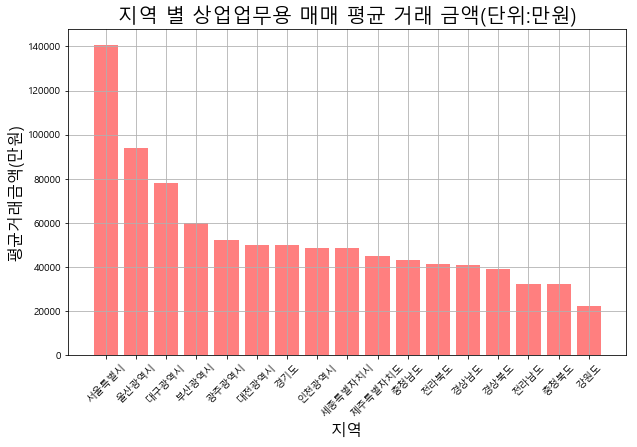

In [67]:
data=df.groupby(["add_do"])[["price"]].mean().sort_values(by=['price'], axis=0, ascending=False)

plt.figure(1, figsize=(10, 6))
plt.title("지역 별 상업업무용 매매 평균 거래 금액(단위:만원)",size=20)
plt.xlabel("지역", size=16)
plt.ylabel("평균거래금액(만원)", size=16)
plt.bar(data.index,data["price"],facecolor="red", alpha=0.5)
plt.xticks(rotation=45)
plt.grid(True)

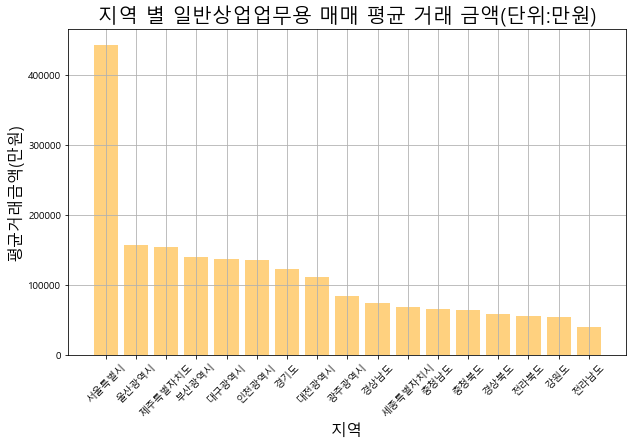

In [68]:
data=df_single.groupby(["add_do"])[["price"]].mean().sort_values(by=['price'], axis=0, ascending=False)

plt.figure(1, figsize=(10, 6))
plt.title("지역 별 일반상업업무용 매매 평균 거래 금액(단위:만원)",size=20)
plt.xlabel("지역", size=16)
plt.ylabel("평균거래금액(만원)", size=16)
plt.bar(data.index,data["price"],facecolor="orange", alpha=0.5)
plt.xticks(rotation=45)
plt.grid(True)

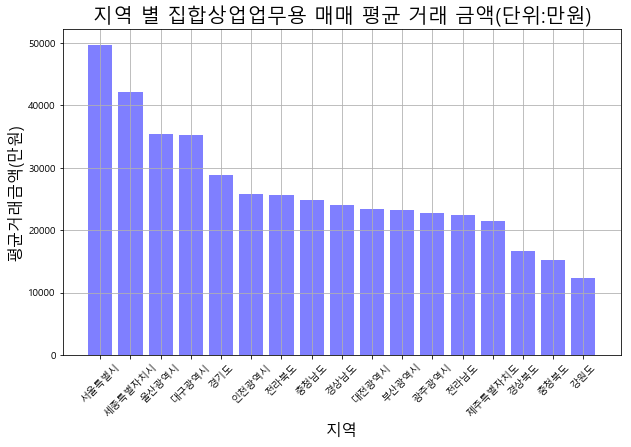

In [69]:

data=df_multi.groupby(["add_do"])[["price"]].mean().sort_values(by=['price'], axis=0, ascending=False)

plt.figure(1, figsize=(10, 6))
plt.title("지역 별 집합상업업무용 매매 평균 거래 금액(단위:만원)",size=20)
plt.xlabel("지역", size=16)
plt.ylabel("평균거래금액(만원)", size=16)
plt.bar(data.index,data["price"],facecolor="blue", alpha=0.5)
plt.xticks(rotation=45)
plt.grid(True)

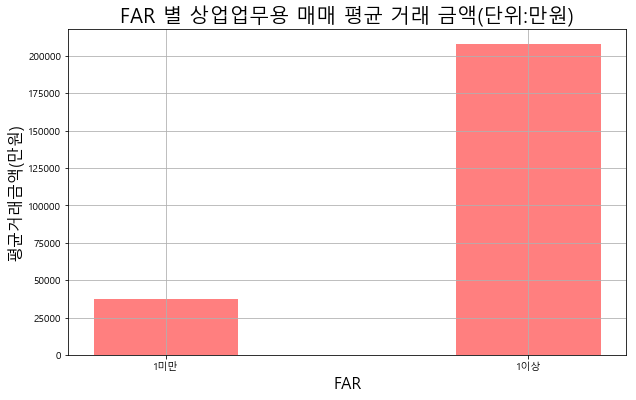

In [70]:

data=df.groupby(["FAR"])[["price"]].mean().sort_values(by=['price'], axis=0, ascending=False)

plt.figure(1, figsize=(10, 6))
plt.title("FAR 별 상업업무용 매매 평균 거래 금액(단위:만원)",size=20)
plt.xlabel("FAR", size=16)
plt.ylabel("평균거래금액(만원)", size=16)
plt.bar(data.index, data["price"],facecolor="red", alpha=0.5, width=0.4,)
plt.xticks([0,1],("1미만","1이상"))
plt.grid(True)

### Scatter-plot

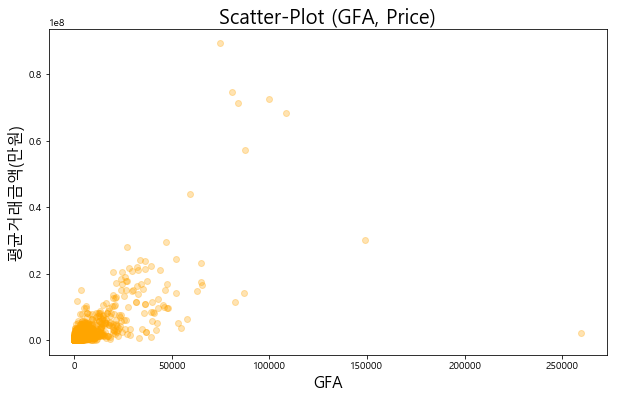

In [71]:
data=df

plt.figure(1, figsize=(10, 6))
plt.title("Scatter-Plot (GFA, Price)",size=20)
plt.xlabel("GFA", size=16)
plt.ylabel("평균거래금액(만원)", size=16)

plt.scatter(data["GFA"], data["price"], facecolor="orange", alpha=0.3)
#plt.xscale("log")

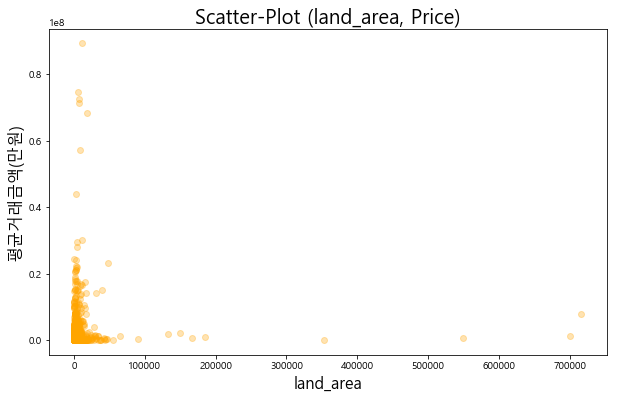

In [88]:
data=df

plt.figure(1, figsize=(10, 6))
plt.title("Scatter-Plot (land_area, Price)",size=20)
plt.xlabel("land_area", size=16)
plt.ylabel("평균거래금액(만원)", size=16)

plt.scatter(data["land_area"], data["price"],facecolor="orange", alpha=0.3)
#plt.xscale("log")

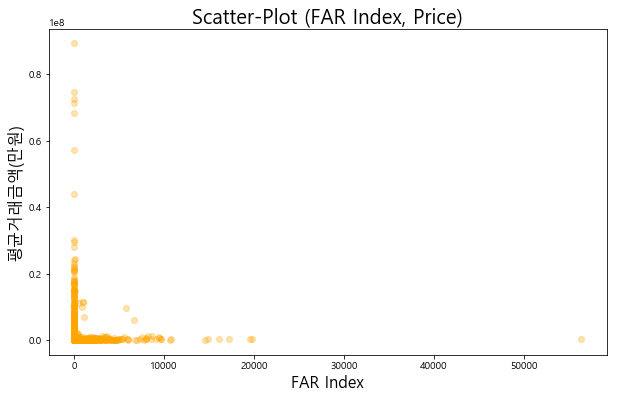

In [89]:
data=df

plt.figure(1, figsize=(10, 6))
plt.title("Scatter-Plot (FAR Index, Price)",size=20)
plt.xlabel("FAR Index", size=16)
plt.ylabel("평균거래금액(만원)", size=16)

plt.scatter(data["GFA"]/data["land_area"], data["price"],facecolor="orange", alpha=0.3)
#plt.xscale("log")

In [112]:
df['c']=df['year_month']*100+df['day']
df['c']

C:\Anaconda3\envs\public_data_eda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



0         20180802
1         20180801
2         20180803
3         20180802
4         20180802
5         20180801
6         20180803
7         20180801
8         20180803
9         20180802
10        20180802
11        20180803
12        20180802
13        20180802
14        20180802
15        20180803
16        20180803
17        20180801
18        20180803
19        20180801
20        20180803
21        20180802
22        20180801
23        20180803
24        20180802
25        20180803
26        20180803
27        20180802
28        20180802
29        20180802
            ...   
257709    20180702
257710    20180702
257711    20180701
257712    20180701
257713    20180703
257714    20180703
257715    20180703
257716    20180702
257717    20180702
257718    20180702
257719    20180703
257720    20180703
257721    20180703
257722    20180702
257723    20180701
257724    20180701
257725    20180703
257726    20180701
257727    20180701
257728    20180701
257729    20180703
257730    20

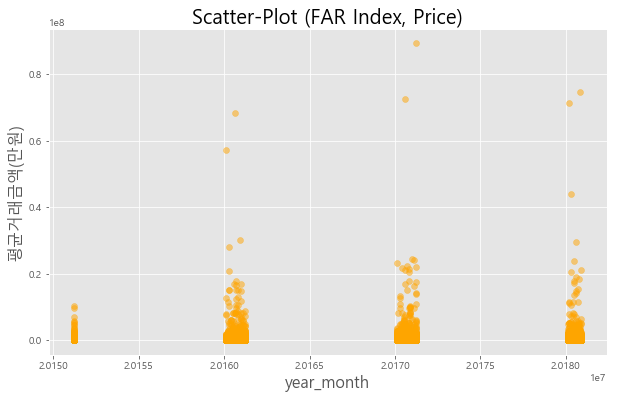

In [119]:

data=df

plt.figure(1, figsize=(10, 6))
plt.title("날짜별 가격",size=20)
plt.xlabel("year_month", size=16)
plt.ylabel("평균거래금액(만원)", size=16)

plt.scatter(data["c"], data["price"],facecolor="orange", alpha=0.5)
#plt.xscale("log")

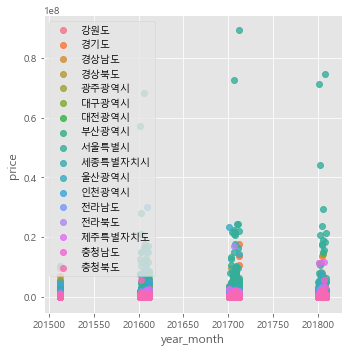

In [133]:
# library & dataset
import seaborn as sns


# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="year_month", y="price", data=df, fit_reg=False, hue='add_do', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper left')
 
#sns.plt.show()


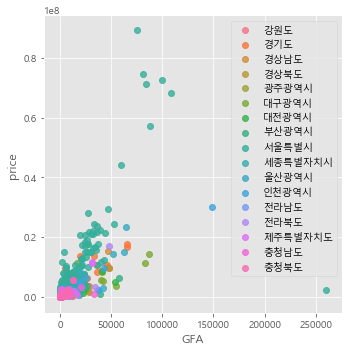

In [143]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="GFA", y="price", data=df, fit_reg=False, hue='add_do', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')
 
#sns.plt.show()

In [145]:
df['add_do']=df['add_do'].astype('category')

C:\Anaconda3\envs\public_data_eda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



C:\Anaconda3\envs\public_data_eda\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

C:\Anaconda3\envs\public_data_eda\lib\site-packages\seaborn\categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

C:\Anaconda3\envs\public_data_eda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



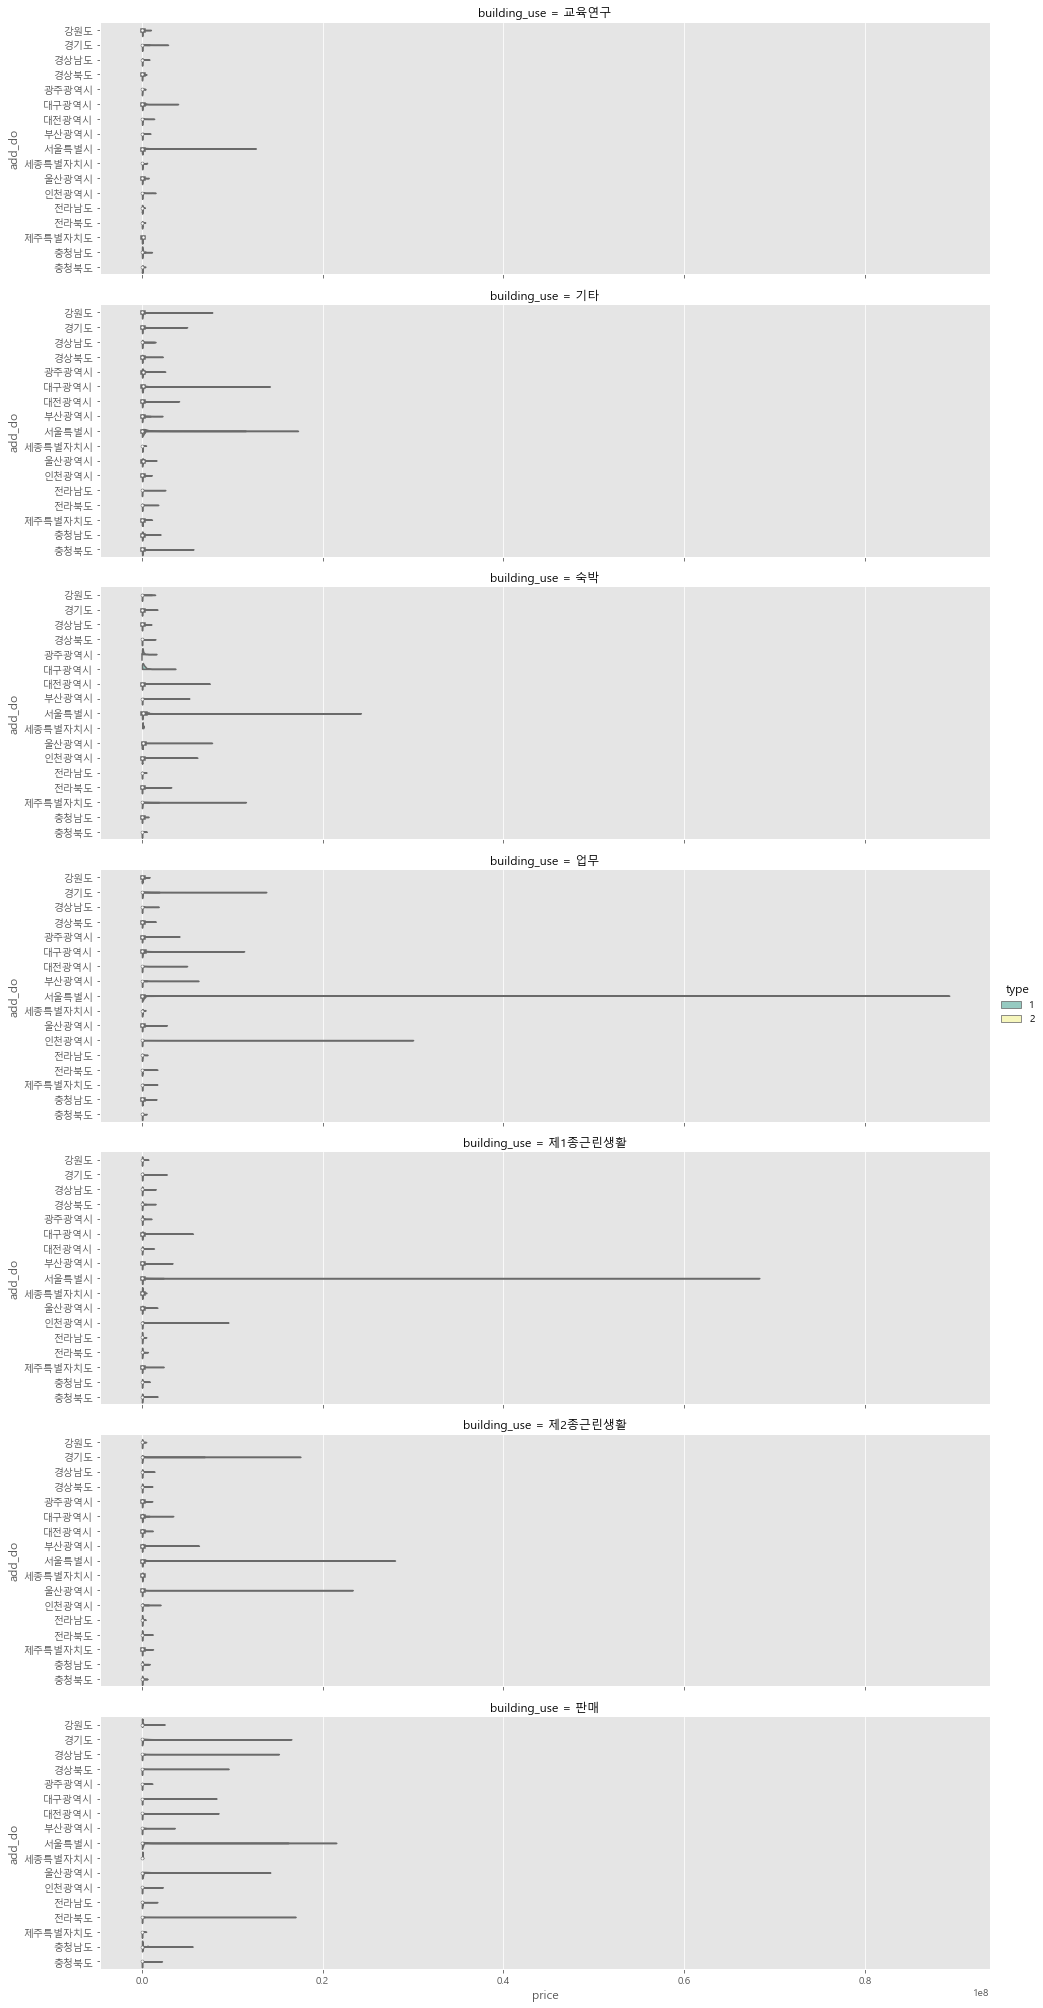

In [195]:
sns.factorplot(x="price", y="add_do", hue="type", row="building_use", data=df,
               orient="h", size=4, aspect=3.5, palette="Set3", kind="violin", split=True, cut=0, bw=.2)
plt.show()

### year_month

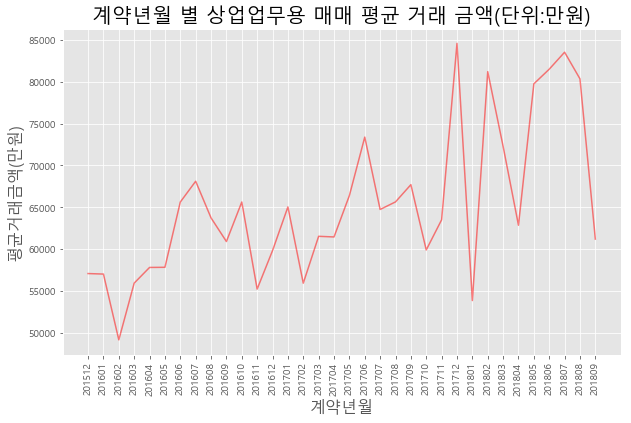

In [141]:
data=df.groupby(["year_month"])[["price"]].mean().sort_values(by=['year_month'], axis=0, ascending=True)
data.index=data.index.astype("category")

objects = list(data.index)
y_pos = np.arange(len(objects))

plt.figure(1, figsize=(10, 6))
plt.title("계약년월 별 상업업무용 매매 평균 거래 금액(단위:만원)",size=20)
plt.xlabel("계약년월", size=16)
plt.ylabel("평균거래금액(만원)", size=16)
plt.plot(y_pos, data["price"], alpha=0.5, color="red")
plt.xticks(y_pos,objects,rotation=90)
plt.grid(True)

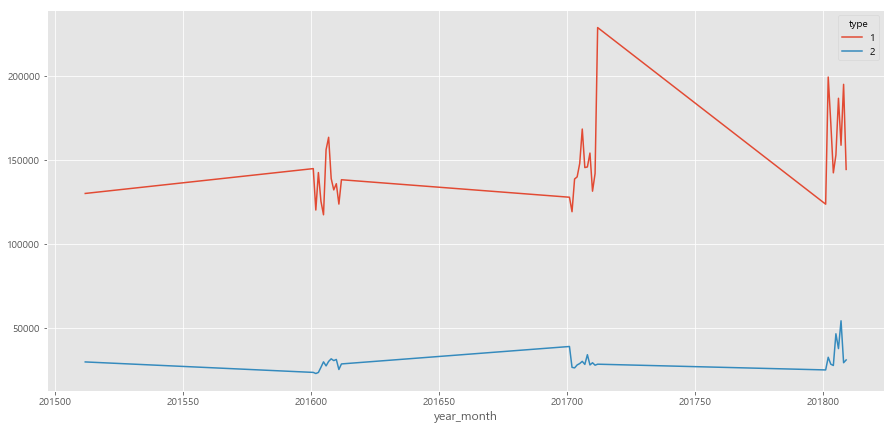

In [139]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['year_month','type']).mean()['price'].unstack().plot(ax=ax)

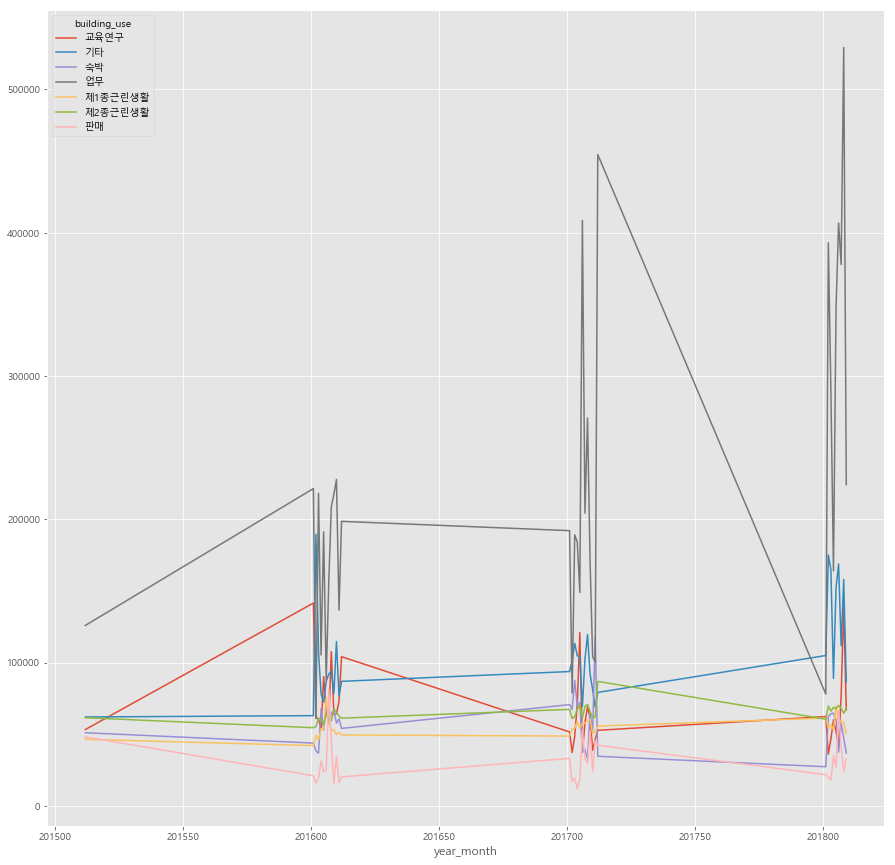

In [138]:
# plot data
fig, ax = plt.subplots(figsize=(15,15))
# use unstack()
df.groupby(['year_month','building_use']).mean()['price'].unstack().plot(ax=ax)

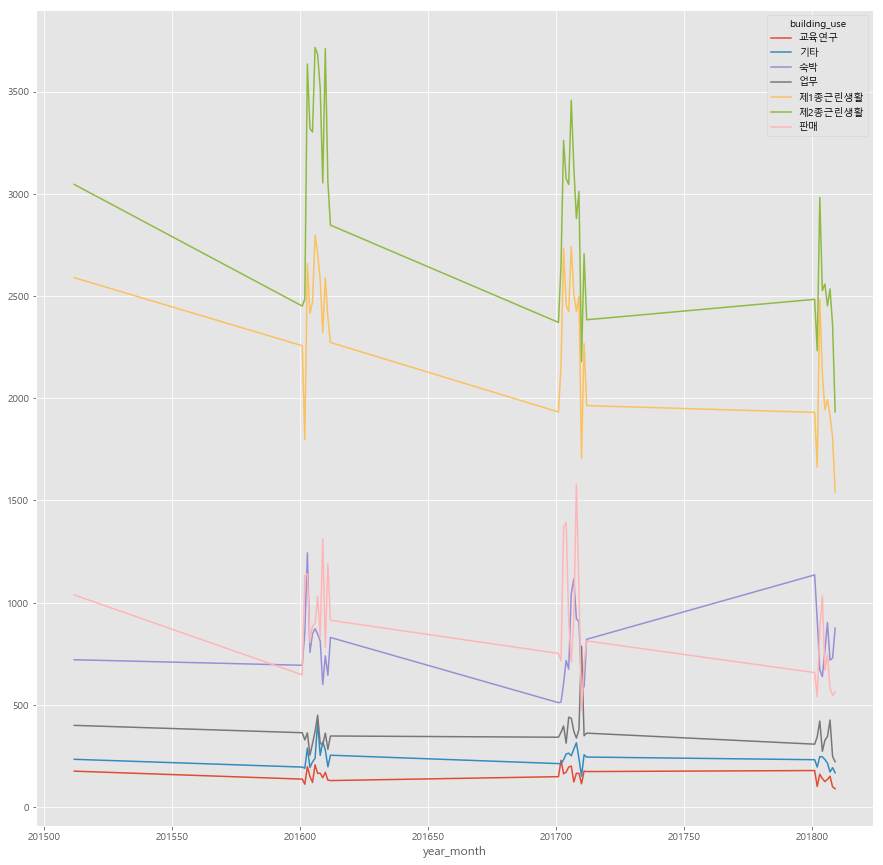

In [104]:
# plot data
fig, ax = plt.subplots(figsize=(15,15))
# use unstack()
df.groupby(['year_month','building_use']).count()['price'].unstack().plot(ax=ax)

In [ ]:
DataFrameGroupBy.plot(df, x='')

C:\Anaconda3\envs\public_data_eda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead



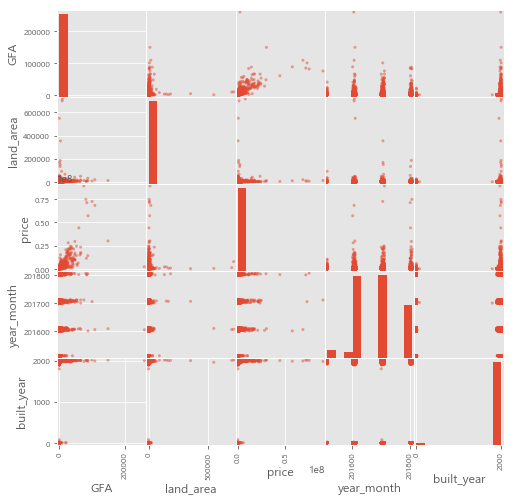

In [76]:
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

pd.scatter_matrix(df,figsize=(8,8))
plt.show()

In [77]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy

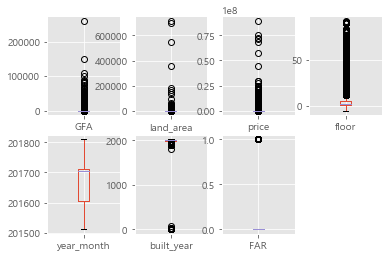

In [80]:
df.plot(kind='box',subplots=True,layout=(2,4), sharex=False, sharey=False)
plt.show()

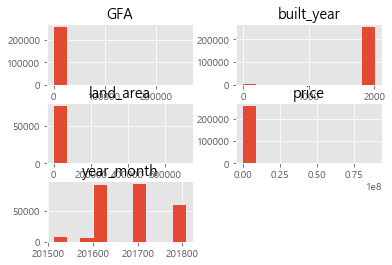

In [81]:
df.hist()
plt.show()

In [82]:
import pandas
from pandas.plotting import scatter_matrix

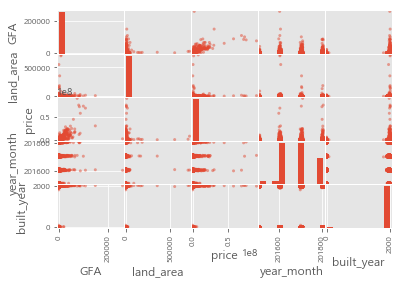

In [83]:
scatter_matrix(df)
plt.show()

In [68]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))


Python: 3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]
scipy: 1.1.0
numpy: 1.15.1
matplotlib: 2.2.3
pandas: 0.23.4
sklearn: 0.19.2


In [84]:
 # Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [71]:
# Split-out validation dataset
array=f.values
X=array[:,[7,8,9,10,11,12,14]]
Y=array[:,5]
validation_size=0.20
seed=7
X_train,X_validation,Y_train,Y_Validation= model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [72]:
 # Test options and evaluation metric
seed = 7
scoring = 'accuracy' 

In [73]:
 # Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KeyboardInterrupt: 

In [ ]:
'''
LR: 0.381137 (0.003370)





C:\Anaconda3\envs\public_data_eda\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning:

The priors do not sum to 1. Renormalizing






LDA: 0.401296 (0.003667)
KNN: 0.460259 (0.001680)
CART: 0.545336 (0.004478)
NB: 0.372563 (0.019744)
'''